In [ ]:
#load cifar-10 dataset
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#Build convolutional auto encoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)


In [ ]:
#compile and train
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 326ms/step - loss: 0.6052 - val_loss: 0.5686
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 322ms/step - loss: 0.5662 - val_loss: 0.5648
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 310ms/step - loss: 0.5628 - val_loss: 0.5629
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 329ms/step - loss: 0.5628 - val_loss: 0.5621
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 315ms/step - loss: 0.5612 - val_loss: 0.5614
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 332ms/step - loss: 0.5605 - val_loss: 0.5608
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 128s 327ms/step - loss: 0.5602 - val_loss: 0.5608
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 128s 327ms/step - loss: 0.5597 - val_loss: 0.5603
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 329ms/step - loss: 0.5594 - val_loss: 0.5602
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 129s 329ms/step - loss: 0.5587 - val_loss: 0.5594
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 329ms/step - loss: 0.5586 - val_loss: 0.5592
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


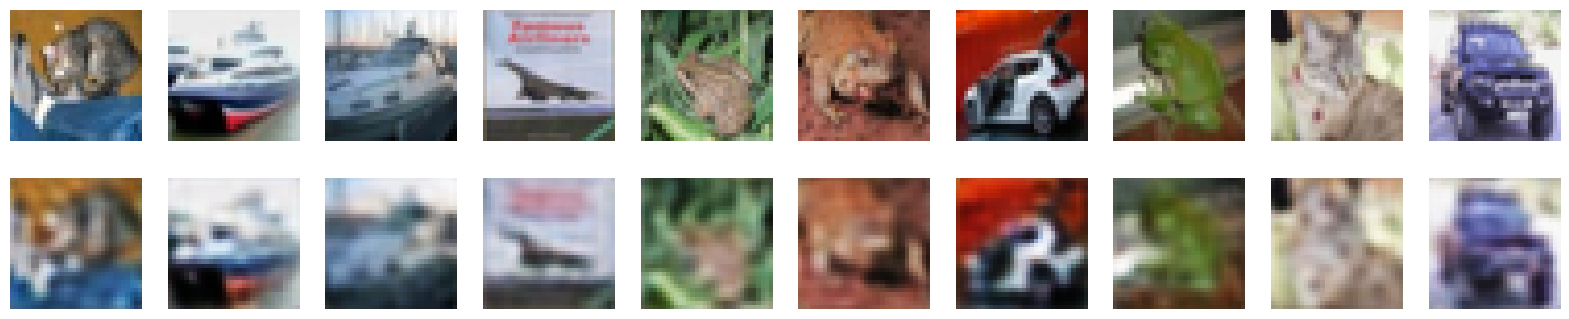

In [ ]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.axis("off")
plt.show()
